# ML Benchmark
**Authors** 
Christopher Metzler, Shehani, Deverell, Malachi Buchheit, Bailey Trip

**Abstract** : It is a standalone section. It is written to give the reader a summary of your work. Be sure to specific, yet brief. Even though the abstract comes first in your paper, it is sometimes easier to write the abstract last. (150-300 words)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Introduction

The Common Core of Data (CCD) is the Department of Education's primary database on public elementary and secondary education in the United States. CCD is a comprehensive, annual, national database of all public elementary and secondary schools and school districts. There are seven categories of data. Within each category, data are organized by year. Within each year, there are four or five different data files. The overall objective of this benchmark is to design and evaluate prediction of high poverty stricken school from the publicly available data, and to evaluate the value of Title 1 school designation.

## Problem Statement 

The overall objective is to design and evaluate prediction of high poverty stricken schools from the publicly available data accross the U.S., and to evaluate the value of Title 1 school designation. The resulting model might grant insight into the factors critical to the success of school districs.

### Related Work

* Include background material as appropriate: who cares about this problem, what impact it has, what implications better solutions might have.
* Included a brief summary of any related work you know about.

# Dataset link: https://nces.ed.gov/ccd/files.asp

The data spans from 2015 to 2018 (3 school years). Schools began reporting more varieties of data in 2015 than previous years, and 2018 is the latest year fiscal data is available. Thus, this selection allows for the greatest range of data.

* Include informal success measures (e.g. accuracy on cross-validated data, without specifying ROC or precision/recall etc) that you planned to use.

Our model will be considered successful if it shows higher than 60% accuracy in testing and validation.

In [2]:
df = pd.read_csv("exploratory.csv", na_values = "?", sep=',', skipinitialspace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19055 entries, 0 to 19054
Data columns (total 62 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Agency Name                                                                     19055 non-null  object
 1   State Name [District] Latest available year                                     19049 non-null  object
 2   Agency Type [District] 2017-18                                                  19051 non-null  object
 3   Agency Type [District] 2016-17                                                  19051 non-null  object
 4   Agency Type [District] 2015-16                                                  19051 non-null  object
 5   School District Level Code (SCHLEV) [District Finance] 2017-18                  19051 non-null  object
 6   School District Level 

## Data Management 

In this section you should address the questions of interest and interpret the results in terms of the questions of interest you proposed. (1-5 pages, including relevant tables and figures, please adjust your figures to appropriate sizes).

- Describe how did you evaluate your solution
- What evaluation metrics did you use?
- Describe a baseline system
- How much did your system outperform the baseline?
- Were there other systems evaluated on the same dataset? How did your system do in comparison to theirs?
- Show graphs/tables with results
- Error analysis
- Suggestions for future improvements

Description of the dataset (dimensions, names of variables with their description)

### Data Gathering

Answer the questions from *Motivation* (Sec 3.1.) *Composition* (Sec 3.2), and *Collection* (Sec 3.3) of the [Datasheets For Datasets](https://arxiv.org/abs/1803.09010) paper here. If benchmarks, describe the data in details:

* The data spans from 2015 to 2018 (3 school years). Schools began reporting more varieties of data in 2015 than previous years, and 2018 is the latest year fiscal data is available. Thus, this selection allows for the greatest range of data.

* Include informal success measures (e.g. accuracy on cross-validated data, without specifying ROC or precision/recall etc) that you planned to use.
Our model will be considered successful if it shows higher than 60% accuracy in testing and validation.

* Justify your methods in terms of the problem statement. What did you consider but *not* use? In particular, be sure to include every method you tried, even if it didn't "work". When describing methods that didn't work, make clear how they failed and any evaluation metrics you used to decide so. How was that a data-driven decision? 

### Data Pre-processing, Cleaning, Labeling, and Maintenance 

What Cleaning, and Processing Tools have you used.  Why? 
* Answer the questions from 3.4 **Preprocessing/cleaning/labeling** of the [Datasheets For Datasets](https://arxiv.org/abs/1803.09010) paper here. 

In [3]:
#Check for NA values
print(df.isna().sum())
#drop existing NA values
df.fillna(value=0,inplace=True)

Agency Name                                                                0
State Name [District] Latest available year                                6
Agency Type [District] 2017-18                                             4
Agency Type [District] 2016-17                                             4
Agency Type [District] 2015-16                                             4
                                                                          ..
Local Rev. - Property Taxes (T06) [District Finance] 2016-17               4
Local Rev. - Property Taxes (T06) [District Finance] 2015-16               4
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18    4
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2016-17    4
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16    4
Length: 62, dtype: int64


In [4]:
#Verify Results
print(df.isna().sum())

Agency Name                                                                0
State Name [District] Latest available year                                0
Agency Type [District] 2017-18                                             0
Agency Type [District] 2016-17                                             0
Agency Type [District] 2015-16                                             0
                                                                          ..
Local Rev. - Property Taxes (T06) [District Finance] 2016-17               0
Local Rev. - Property Taxes (T06) [District Finance] 2015-16               0
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18    0
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2016-17    0
Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16    0
Length: 62, dtype: int64


In [5]:
#Split the data into years 2015-16, 2016-17 and 2017-18
years_15_16 = df[['Agency Name', 'State Name [District] Latest available year', 'Agency Type [District] 2015-16', 'School District Level Code (SCHLEV) [District Finance] 2015-16', 'Urban-centric Locale [District] 2015-16','Total Students All Grades (Includes AE) [District] 2015-16','American Indian/Alaska Native Students [District] 2015-16', 'Hispanic Students [District] 2015-16','Asian or Asian/Pacific Islander Students [District] 2015-16','Black or African American Students [District] 2015-16','White Students [District] 2015-16','Two or More Races Students [District] 2015-16','Nat. Hawaiian or Other Pacific Isl. Students [District] 2015-16','Total Race/Ethnicity [District] 2015-16','Pupil/Teacher Ratio [District] 2015-16','Total Staff [District] 2015-16','Total General Revenue (TOTALREV) [District Finance] 2015-16','Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2015-16','State Rev. - General Formula Assistance (C01) [District Finance] 2015-16','Local Rev. - Property Taxes (T06) [District Finance] 2015-16','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16']].copy()
#years_15_16.info()

years_16_17 = df[['Agency Name', 'State Name [District] Latest available year', 'Agency Type [District] 2016-17', 'School District Level Code (SCHLEV) [District Finance] 2016-17', 'Urban-centric Locale [District] 2016-17','Total Students All Grades (Includes AE) [District] 2016-17','American Indian/Alaska Native Students [District] 2016-17', 'Hispanic Students [District] 2016-17','Asian or Asian/Pacific Islander Students [District] 2016-17','Black or African American Students [District] 2016-17','White Students [District] 2016-17','Two or More Races Students [District] 2016-17','Nat. Hawaiian or Other Pacific Isl. Students [District] 2016-17','Total Race/Ethnicity [District] 2016-17','Pupil/Teacher Ratio [District] 2016-17','Total Staff [District] 2016-17','Total General Revenue (TOTALREV) [District Finance] 2016-17','Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2016-17','State Rev. - General Formula Assistance (C01) [District Finance] 2016-17','Local Rev. - Property Taxes (T06) [District Finance] 2016-17','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2016-17']].copy()
#years_16_17.info()

years_17_18 = df[['Agency Name', 'State Name [District] Latest available year', 'Agency Type [District] 2017-18', 'School District Level Code (SCHLEV) [District Finance] 2017-18', 'Urban-centric Locale [District] 2017-18','Total Students All Grades (Includes AE) [District] 2017-18','American Indian/Alaska Native Students [District] 2017-18', 'Hispanic Students [District] 2017-18','Asian or Asian/Pacific Islander Students [District] 2017-18','Black or African American Students [District] 2017-18','White Students [District] 2017-18','Two or More Races Students [District] 2017-18','Nat. Hawaiian or Other Pacific Isl. Students [District] 2017-18','Total Race/Ethnicity [District] 2017-18','Pupil/Teacher Ratio [District] 2017-18','Total Staff [District] 2017-18','Total General Revenue (TOTALREV) [District Finance] 2017-18','Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2017-18','State Rev. - General Formula Assistance (C01) [District Finance] 2017-18','Local Rev. - Property Taxes (T06) [District Finance] 2017-18','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18']].copy()
years_17_18.describe()

,Agency Name,State Name [District] Latest available year,Agency Type [District] 2017-18,School District Level Code (SCHLEV) [District Finance] 2017-18,Urban-centric Locale [District] 2017-18,Total Students All Grades (Includes AE) [District] 2017-18,American Indian/Alaska Native Students [District] 2017-18,Hispanic Students [District] 2017-18,Asian or Asian/Pacific Islander Students [District] 2017-18,Black or African American Students [District] 2017-18,...,Nat. Hawaiian or Other Pacific Isl. Students [District] 2017-18,Total Race/Ethnicity [District] 2017-18,Pupil/Teacher Ratio [District] 2017-18,Total Staff [District] 2017-18,Total General Revenue (TOTALREV) [District Finance] 2017-18,Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18,Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2017-18,State Rev. - General Formula Assistance (C01) [District Finance] 2017-18,Local Rev. - Property Taxes (T06) [District Finance] 2017-18,Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18
count,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055,...,19055,19055,19055,19055,19055,19055,19055,19055,19055,19055
unique,18511,97,11,8,14,5525,547,2526,1195,1979,...,260,5514,2350,12674,13958,10566,8456,10155,8571,2696
top,DISCOVERY CHARTER SCHOOL,Texas,1-Regular local school district that is NOT a ...,"=""03-Elementary/secondary school system""",21-Suburb: Large,†,"=""0""",†,"=""0""","=""0""",...,"=""0""","=""0""",†,–,†,†,"=""0""",†,†,"=""0"""
freq,6,1243,13147,11393,3416,1561,3017,1561,2814,1743,...,5397,1619,2763,1185,1510,2587,5620,1510,6517,2483


Begin data normalization on the remaining columns:

In [6]:
#Set real labels
realcol_2015_16 = ['Total Students All Grades (Includes AE) [District] 2015-16','American Indian/Alaska Native Students [District] 2015-16', 'Hispanic Students [District] 2015-16','Asian or Asian/Pacific Islander Students [District] 2015-16','Black or African American Students [District] 2015-16','White Students [District] 2015-16','Two or More Races Students [District] 2015-16','Nat. Hawaiian or Other Pacific Isl. Students [District] 2015-16','Total Race/Ethnicity [District] 2015-16','Pupil/Teacher Ratio [District] 2015-16','Total Staff [District] 2015-16','Total General Revenue (TOTALREV) [District Finance] 2015-16','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2015-16','State Rev. - General Formula Assistance (C01) [District Finance] 2015-16','Local Rev. - Property Taxes (T06) [District Finance] 2015-16','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16']
realcol_2016_17 = ['Total Students All Grades (Includes AE) [District] 2016-17','American Indian/Alaska Native Students [District] 2016-17', 'Hispanic Students [District] 2016-17','Asian or Asian/Pacific Islander Students [District] 2016-17','Black or African American Students [District] 2016-17','White Students [District] 2016-17','Two or More Races Students [District] 2016-17','Nat. Hawaiian or Other Pacific Isl. Students [District] 2016-17','Total Race/Ethnicity [District] 2016-17','Pupil/Teacher Ratio [District] 2016-17','Total Staff [District] 2016-17','Total General Revenue (TOTALREV) [District Finance] 2016-17','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2016-17','State Rev. - General Formula Assistance (C01) [District Finance] 2016-17','Local Rev. - Property Taxes (T06) [District Finance] 2016-17','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2016-17']
realcol_2017_18 = ['Total Students All Grades (Includes AE) [District] 2017-18','American Indian/Alaska Native Students [District] 2017-18', 'Hispanic Students [District] 2017-18','Asian or Asian/Pacific Islander Students [District] 2017-18','Black or African American Students [District] 2017-18','White Students [District] 2017-18','Two or More Races Students [District] 2017-18','Nat. Hawaiian or Other Pacific Isl. Students [District] 2017-18','Total Race/Ethnicity [District] 2017-18','Pupil/Teacher Ratio [District] 2017-18','Total Staff [District] 2017-18','Total General Revenue (TOTALREV) [District Finance] 2017-18','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2017-18','State Rev. - General Formula Assistance (C01) [District Finance] 2017-18','Local Rev. - Property Taxes (T06) [District Finance] 2017-18','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2017-18']

#Continue cleaning data to account for uninterpretable strings
years_15_16[realcol_2015_16] = years_15_16[realcol_2015_16].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
#years_15_16.fillna(years_15_16[realcol_2015_16].mean(), inplace=True) #Convert NaN's into  mean
years_15_16.fillna(0, inplace=True) #Convert NaN's into interpretable data
#print(years_15_16.head(25))

years_16_17[realcol_2016_17] = years_16_17[realcol_2016_17].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
#years_16_17.fillna(years_16_17[realcol_2016_17].mean(), inplace=True) #Convert NaN's into  mean
years_16_17.fillna(0, inplace=True) #Convert NaN's into interpretable data
#print(years_16_17.head(5))

years_17_18[realcol_2017_18] = years_17_18[realcol_2017_18].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
#years_17_18.fillna(years_17_18[realcol_2017_18].mean(), inplace=True) #Convert NaN's into  mean
years_17_18.fillna(0, inplace=True) #Convert NaN's into interpretable data
#print(years_17_18.head(5))

In [7]:
years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'] = years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
years_15_16.fillna(0, inplace=True) #Convert NaN's into interpretable data
years_15_16['cStrict Poverty'] = years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'] < 10000
years_15_16['bHigh Poverty'] = years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'] < 15000
years_15_16['aNo Poverty'] = years_15_16['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16'] > 15000
years_15_16['bHigh Poverty'].where(years_15_16['cStrict Poverty'] == False, other=False, inplace=True)
years_15_16['bHigh Poverty'].fillna(value=False, inplace=True)
years_15_16['Poverty Level'] = years_15_16.loc[:,['cStrict Poverty', 'bHigh Poverty', 'aNo Poverty']].eq(True).idxmax(axis=1).astype('category').cat.codes
years_15_16.drop(labels=['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2015-16','cStrict Poverty','bHigh Poverty','aNo Poverty'], axis=1, inplace=True)


years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'] = years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
years_16_17.fillna(0, inplace=True) #Convert NaN's into interpretable data
years_16_17['cStrict Poverty'] = years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'] < 10000
years_16_17['bHigh Poverty'] = years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'] < 15000
years_16_17['aNo Poverty'] = years_16_17['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17'] > 15000
years_16_17['bHigh Poverty'].where(years_16_17['cStrict Poverty'] == False, other=False, inplace=True)
years_16_17['bHigh Poverty'].fillna(value=False, inplace=True)
years_16_17['Poverty Level'] = years_16_17.loc[:,['cStrict Poverty', 'bHigh Poverty', 'aNo Poverty']].eq(True).idxmax(axis=1).astype('category').cat.codes
years_16_17.drop(labels=['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2016-17','cStrict Poverty','bHigh Poverty','aNo Poverty'], axis=1, inplace=True)


years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'] = years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'].apply(pd.to_numeric, errors='coerce') #Converts uninterpretable data into NaN's
years_17_18.fillna(0, inplace=True) #Convert NaN's into interpretable data
years_17_18['cStrict Poverty'] = years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'] < 10000
years_17_18['bHigh Poverty'] = years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'] < 15000
years_17_18['aNo Poverty'] = years_17_18['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18'] > 15000
years_17_18['bHigh Poverty'].where(years_17_18['cStrict Poverty'] == False, other=False, inplace=True)
years_17_18['bHigh Poverty'].fillna(value=False, inplace=True)
years_17_18['Poverty Level'] = years_17_18.loc[:,['cStrict Poverty', 'bHigh Poverty', 'aNo Poverty']].eq(True).idxmax(axis=1).astype('category').cat.codes
years_17_18.drop(labels=['Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2017-18','cStrict Poverty','bHigh Poverty','aNo Poverty'], axis=1, inplace=True)


years_15_16

,Agency Name,State Name [District] Latest available year,Agency Type [District] 2015-16,School District Level Code (SCHLEV) [District Finance] 2015-16,Urban-centric Locale [District] 2015-16,Total Students All Grades (Includes AE) [District] 2015-16,American Indian/Alaska Native Students [District] 2015-16,Hispanic Students [District] 2015-16,Asian or Asian/Pacific Islander Students [District] 2015-16,Black or African American Students [District] 2015-16,...,Nat. Hawaiian or Other Pacific Isl. Students [District] 2015-16,Total Race/Ethnicity [District] 2015-16,Pupil/Teacher Ratio [District] 2015-16,Total Staff [District] 2015-16,Total General Revenue (TOTALREV) [District Finance] 2015-16,Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2015-16,State Rev. - General Formula Assistance (C01) [District Finance] 2015-16,Local Rev. - Property Taxes (T06) [District Finance] 2015-16,Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16,Poverty Level
0,(ILC) ATOKA-COAL COUNTIES,Oklahoma,8-Other education agencies,"=""07-Educational service agency""",43-Rural: Remote,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2
1,21ST CENTURY CHARTER SCH OF GARY,Indiana,7-Independent Charter District,"=""03-Elementary/secondary school system""",13-City: Small,758.0,1.0,15.0,0.0,734.0,...,0.0,758.0,379.00,16.00,8129000.0,13325000.0,5585000.0,0.0,831000.0,1
2,21ST CENTURY CYBER CS,Pennsylvania,7-Independent Charter District,"=""03-Elementary/secondary school system""",21-Suburb: Large,818.0,1.0,49.0,10.0,63.0,...,2.0,818.0,21.25,67.20,10815000.0,0.0,0.0,0.0,0.0,1
3,21ST CENTURY PREPARATORY SCHOOL AGENCY,Wisconsin,7-Independent Charter District,"=""01-Elementary school system only""",13-City: Small,445.0,0.0,139.0,2.0,202.0,...,0.0,445.0,24.72,34.00,0.0,0.0,0.0,0.0,0.0,2
4,A CENTER FOR CREATIVE EDUCATION (79457),Arizona,7-Independent Charter District,"=""01-Elementary school system only""",32-Town: Distant,70.0,0.0,11.0,0.0,0.0,...,0.0,70.0,0.00,0.00,549000.0,0.0,509000.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19050,ZURICH ELEM,Montana,1-Regular local school district that is NOT a ...,"=""01-Elementary school system only""",43-Rural: Remote,22.0,5.0,0.0,0.0,0.0,...,0.0,22.0,7.33,6.38,373000.0,4000.0,78000.0,98000.0,44000.0,0
19051,Data Source: U.S. Department of Education Nati...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2
19052,† indicates that the data are not applicable.,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2
19053,– indicates that the data are missing.,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2


In [8]:
#Begin normalization for 2015-2016
for col in realcol_2015_16:
    mean = years_15_16[col].mean()
    std = years_15_16[col].std()
    years_15_16[col] = (years_15_16[col] - mean)/std

#Begin normalization for 2016-2017
for col in realcol_2016_17:
    mean = years_16_17[col].mean()
    std = years_16_17[col].std()
    years_16_17[col] = (years_16_17[col] - mean)/std

#Begin normalization for 2017-2018
for col in realcol_2017_18:
    mean = years_17_18[col].mean()
    std = years_17_18[col].std()
    years_17_18[col] = (years_17_18[col] - mean)/std

<AxesSubplot:>

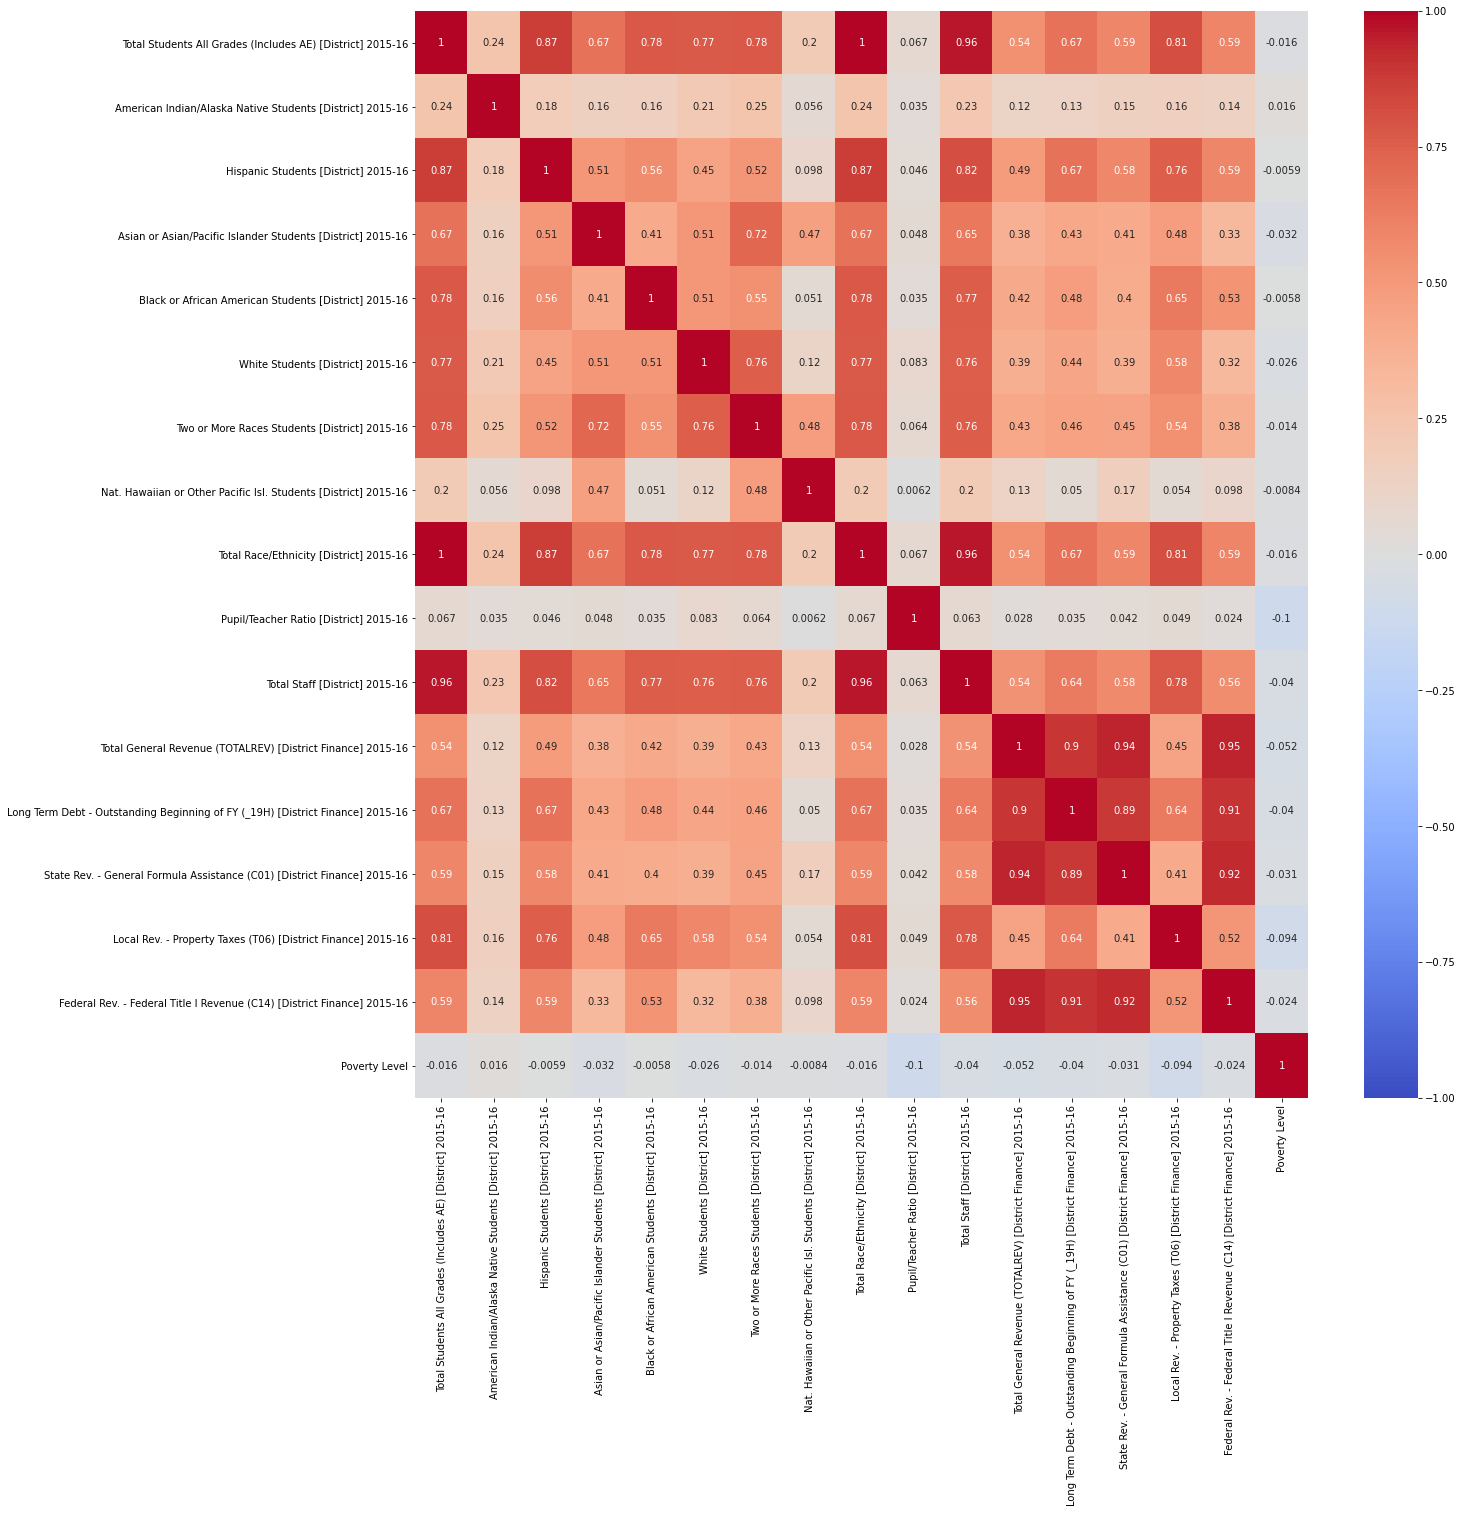

In [9]:
plt.figure(figsize=(20,20))
#sns.pairplot(years_15_16)
sns.heatmap(years_15_16.corr(),annot=True,cmap='coolwarm',vmin=-1)
#sns.heatmap(years_16_17.corr(),annot=True,cmap='coolwarm',vmin=-1)
#sns.heatmap(years_17_18.corr(),annot=True,cmap='coolwarm',vmin=-1)

Set catagorical columns into dummy variables.

In [10]:
col_2015_16 = ["Agency Type [District] 2015-16", "School District Level Code (SCHLEV) [District Finance] 2015-16", "Urban-centric Locale [District] 2015-16"]
col_2016_17 = ["Agency Type [District] 2016-17", "School District Level Code (SCHLEV) [District Finance] 2016-17", "Urban-centric Locale [District] 2016-17"]
col_2017_18 = ["Agency Type [District] 2017-18", "School District Level Code (SCHLEV) [District Finance] 2017-18", "Urban-centric Locale [District] 2017-18"]

years_15_16 = pd.get_dummies(years_15_16, columns=col_2015_16)
years_16_17 = pd.get_dummies(years_16_17, columns=col_2016_17)
years_17_18 = pd.get_dummies(years_17_18, columns=col_2017_18)


"""
years_15_16.join(pd.get_dummies(years_15_16['Urban-centric Locale [District] 2015-16']))
years_15_16.drop('Urban-centric Locale [District] 2015-16', inplace=True, axis=1)

years_16_17.join(pd.get_dummies(years_16_17['Urban-centric Locale [District] 2016-17']))
years_16_17.drop('Urban-centric Locale [District] 2016-17', inplace=True, axis=1)

years_17_18.join(pd.get_dummies(years_17_18['Urban-centric Locale [District] 2017-18']))
years_17_18.drop('Urban-centric Locale [District] 2017-18', inplace=True, axis=1)
"""

"\nyears_15_16.join(pd.get_dummies(years_15_16['Urban-centric Locale [District] 2015-16']))\nyears_15_16.drop('Urban-centric Locale [District] 2015-16', inplace=True, axis=1)\n\nyears_16_17.join(pd.get_dummies(years_16_17['Urban-centric Locale [District] 2016-17']))\nyears_16_17.drop('Urban-centric Locale [District] 2016-17', inplace=True, axis=1)\n\nyears_17_18.join(pd.get_dummies(years_17_18['Urban-centric Locale [District] 2017-18']))\nyears_17_18.drop('Urban-centric Locale [District] 2017-18', inplace=True, axis=1)\n"

Feature selection

In [11]:
col_remove = ['Agency Name', 'State Name [District] Latest available year']

col_remove_2017_18 = ['American Indian/Alaska Native Students [District] 2017-18','Nat. Hawaiian or Other Pacific Isl. Students [District] 2017-18','Total General Revenue (TOTALREV) [District Finance] 2017-18','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2017-18','State Rev. - General Formula Assistance (C01) [District Finance] 2017-18']
years_17_18.drop(columns=col_remove+col_remove_2017_18, inplace=True)

col_remove_2016_17 = []
for col in col_remove_2017_18:
    col_remove_2016_17.append(col[:-7]+"2016-17")
years_16_17.drop(columns=col_remove+col_remove_2016_17, inplace=True)

col_remove_2015_16 = []
for col in col_remove_2017_18:
    col_remove_2015_16.append(col[:-7]+"2015-16")
years_15_16.drop(columns=col_remove+col_remove_2015_16, inplace=True)

## Machine Learning Approaches

In this section, you could describe the methods you used in your analysis. For example, if you are doing classifications, you could introduce the methods like logistic regression, discriminant analysis, support vector machines. You don't have to write formulas if you don't want to do so. It is fine to describe the methods in words. This section basically is a description of the methodologies that you have used for analyzing your data. (up to 2pages)
Describe the choice of Machine Learning Tool.  Refer ro related work, if applicable.  

* Evaluate a primary model and in addition a "baseline" model. 
  * The baseline is typically the simplest model that's applicable to that data problem
    * Naive Bayes for classification
	* K-means on raw feature data for clustering.
* Evaluate state-of-art model 
  * Research gitHuib, paperswithcode, Kaggle and similar. 
  * If not applicable, talk to the instructor.  
  
**Hint** Goal is to have some sort of baseline evaluation by Nov 11th checkpoint to establish a scale by which to measure your project's performance. Compare the performance of your baseline model and primary model and explain the differences.

** This is where all the methods you have tried go, including state-of-art if any **

In [12]:
# Assign values to y
rev_col = ['Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2015-16']
pov_col = ['Poverty Level']
lab_col = pov_col

y = years_15_16[lab_col].values
# Drop column from data frame
years_15_16.drop(columns=lab_col, inplace=True)

# Assign df values to x
x = years_15_16.values

# View shape of x and y
print(x.shape, y.shape)

# Use stratify = y and test_size = 0.2 and random_state = 1

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=1)

(19055, 43) (19055, 1)


Linear Regression

In [13]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(xtrain,ytrain)
reg.score(xtest,ytest)

# Calculate the score on train and test sets
# Your code goes below
reg.score(xtrain,ytrain), reg.score(xtest,ytest)

(0.4068138008929064, 0.38147570792025276)

Decision Tree

In [14]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)

dtc.score(xtrain, ytrain), dtc.score(xtest,ytest)

(1.0, 0.718971398583049)

### Describe the ML methods that you used and the reasons for their choice. 
What is the family of machine learnign algorithms you are using and why? 
* Supervised or Unsupervised?
* Regression or classification?

### Justify ML algorithms in terms of the problem itself and the methods you want to use. 
* How did you employ them? 
* What features worked well and what didn't?
* Provide documentation for integration  

### Tools and Infrastructure Tried and Not Used

Describe any tools and infrastruicture that you tried and ended up not using.
What was the problem? 
Describe infrastructure used. 

## Experiments

Give a detailed summary of the results of your work.

 * Setup - Here is where you specify the exact performance measures you used.  
   * Describe the data used in experiment for presenting dataset: Datasheets for Dataset template 
   * Describe your accuracy or quality measure, and your performance (runtime or throughput) measure. 
   
 * Please use visualizations whenever possible. Include links to interactive visualizations if you built them. 
 
 * You can also submit a separated notebook as an appendix to your report if that makes the visualization/interaction task easier. 
   * It would be reasonable to submit your report as a notebook, but please make sure it runs on one of the two standard environments, and that you include any required files. 